In [10]:
import numpy as np
import matplotlib.pyplot as plt
from AWG_function import *

In [11]:
inst=connect_PXI()

Load TEProteus.dll from : C:\Windows\system32\TEProteus.dll
connected to: slot#: 8,


In [12]:
carrier_frequency=100E6
configurate_one_DAC(inst=inst,channel=1,carrier_frequency=carrier_frequency,trigger_channel=1)
pulse_1ns=segment(inst=inst,segnum=1)
pulse_1ns.default_pulse(length=640,amplitude=0.5,phase=0,type='sine')
pulse_1ns.compile_and_download_segment()

empty = segment(inst=inst, segnum=2)
empty.default_pulse(length=480, amplitude=0.5, phase=0, type='empty')
empty.compile_and_download_segment()

ch1_task=task_table(inst=inst,length=3)
ch1_task.new_task(tasknum=1,segnum=1,ext_trigger_ch=1,digitizer_trigger=False,next_task=2)
ch1_task.new_task(tasknum=2,segnum=2,ext_trigger_ch=0,digitizer_trigger=True,next_task=3)
ch1_task.new_task(tasknum=3,segnum=1,ext_trigger_ch=0,digitizer_trigger=False,next_task=1)
ch1_task.download_task_table()

DAC sample rate 1.00GS/s, SCLK 8.00GS/s
DAC minimun segment length 32.0ns, segment granuality 16.0ns
DAC configuration successful
channel 1, segment 1 downloaded, length 640.0ns
channel 1, segment 2 downloaded, length 480.0ns
channel 1 task table downloaded


In [13]:
carrier_frequency=100E6
configurate_one_DAC(inst=inst,channel=3,carrier_frequency=carrier_frequency,trigger_channel=1)
pulse_1ns=segment(inst=inst,segnum=1)
pulse_1ns.default_pulse(length=640,amplitude=0.5,phase=0,type='sine')
pulse_1ns.compile_and_download_segment()

empty = segment(inst=inst, segnum=2)
empty.default_pulse(length=480, amplitude=0.5, phase=0, type='empty')
empty.compile_and_download_segment()

ch1_task=task_table(inst=inst,length=3)
ch1_task.new_task(tasknum=1,segnum=1,ext_trigger_ch=1,digitizer_trigger=False,next_task=2)
ch1_task.new_task(tasknum=2,segnum=2,ext_trigger_ch=0,digitizer_trigger=True,next_task=3)
ch1_task.new_task(tasknum=3,segnum=1,ext_trigger_ch=0,digitizer_trigger=False,next_task=1)
ch1_task.download_task_table()

DAC sample rate 1.00GS/s, SCLK 8.00GS/s
DAC minimun segment length 32.0ns, segment granuality 16.0ns
DAC configuration successful
channel 3, segment 1 downloaded, length 640.0ns
channel 3, segment 2 downloaded, length 480.0ns
channel 3 task table downloaded


In [14]:
ch1_digitizer=digitizer(address={'inst':inst,'channel':1},task_trigger_channel=1,carrier_frequency=carrier_frequency,numframes=1,framelen=4800)
ch3_digitizer=digitizer(address={'inst':inst,'channel':2},task_trigger_channel=3,carrier_frequency=carrier_frequency,numframes=1,framelen=4800)

digitizer sample rate 0.12GS/s, SCLK 2.00GS/s
digitizer granularity 384.0ns
Channel 1 acquisition frame Length 19200.0 ns, frame number 1
digitizer sample rate 0.12GS/s, SCLK 2.00GS/s
digitizer granularity 384.0ns
Channel 2 acquisition frame Length 19200.0 ns, frame number 1


In [15]:
print(ch1_digitizer.inquire_acquisition())
print(ch3_digitizer.inquire_acquisition())

(1, 1)
(1, 1)


In [16]:
ch1_digitizer.read_digitizer_data()
ch3_digitizer.read_digitizer_data()

Total read size in bytes: 19200
acquired 2400 complex points, 2400.0ns
Total read size in bytes: 19200
acquired 2400 complex points, 2400.0ns


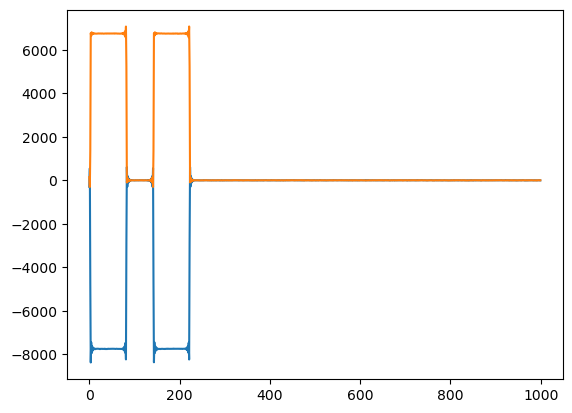

In [17]:
plt.plot(ch1_digitizer.wavI[0:1000])
plt.plot(ch3_digitizer.wavI[0:1000])